# **Setup**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Set Style
plt.style.use('ggplot')

# **Data Import**

In [2]:
df = pd.read_csv('coaster_db.csv')
print(df.shape)
df.head()

(1087, 56)


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
# Check Columns
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [4]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# **Data Preparation**

## **Drop Columns**

In [6]:
df = df.loc[:,['coaster_name', 
        #   'Length', 'Speed', 
        'Location', 'Status', 'Opening date','Type',
        'Manufacturer', 
        # 'Height restriction', 'Model', 'Height', 'Inversions', 'Lift/launch system', 'Cost', 'Trains',
        # 'Park section', 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 
    # 'Opened', 'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #    'height_value', 'height_unit', 
    'height_ft','Inversions_clean', 'Gforce_clean']].copy()
df.head()

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Wood,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1901,Steel,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1901,Steel,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


## **Rename Columns**

In [7]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Type',
       'Manufacturer', 'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [8]:
df.rename(columns={'Inversions_clean':'Inversions','Gforce_clean':'Gforce'},inplace=True)
df.columns

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Type',
       'Manufacturer', 'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions', 'Gforce'],
      dtype='object')

## **Check Missing Values**

In [9]:
df.shape

(1087, 15)

In [10]:
df.isna().sum()

coaster_name            0
Location                0
Status                213
Opening date          250
Type                    0
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions              0
Gforce                725
dtype: int64

## **Check Duplicated Values**

In [11]:
# Check For Duplicates
df.loc[df.duplicated()]

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce


In [12]:
# Check For Duplicates In Individual Column
df.loc[df['coaster_name'].duplicated(),'coaster_name']

43                   Crystal Beach Cyclone
60                             Derby Racer
61             Blue Streak (Conneaut Lake)
167          Big Thunder Mountain Railroad
237      Thunder Run (Canada's Wonderland)
                       ...                
1063                    Lil' Devil Coaster
1064    Little Dipper (Conneaut Lake Park)
1080                            Iron Gwazi
1082               American Dreier Looping
1084             Tron Lightcycle Power Run
Name: coaster_name, Length: 97, dtype: object

In [13]:
# Check For Some Duplicated Cosater Names
df.query('coaster_name=="Crystal Beach Cyclone"')

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,1926,Wood,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [14]:
# Check For Some Duplicated Cosater Names
df.query('coaster_name=="Iron Gwazi"')

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
482,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,1999,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN


In [18]:
# Check Duplicates Across Specified Columns
print(df.duplicated(keep=False,subset=['coaster_name','Location']).sum())
print(df.duplicated(keep=False,subset=['coaster_name','Location','Opening date','latitude','longitude']).sum())

# Get Duplicated Rows
df[df.duplicated(keep=False,subset=['coaster_name','Location','Opening date','latitude','longitude'])].sort_values(by='coaster_name',ascending=True)

173
173


,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
467,Afterburn (roller coaster),Carowinds,Operating,"March 20, 1999",Steel – Inverted,Bolliger & Mabillard,1999,35.1003,-80.9409,Steel,1999-03-20,62.0,NaN,6,NaN
780,Afterburn (roller coaster),Carowinds,Operating,"March 20, 1999",Steel – Inverted,Bolliger & Mabillard,2009,35.1003,-80.9409,Steel,1999-03-20,62.0,NaN,6,NaN
270,Alpine Bobsled,Other,NaN,NaN,Steel,Intamin,1989,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
435,Alpine Bobsled,Other,NaN,NaN,Steel,Intamin,1998,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
206,Alpine Bobsled,Other,NaN,NaN,Steel,Intamin,1984,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Wild Mouse (Idlewild),Idlewild and Soak Zone,Operating,1985 (original)1993 (current location)[1],Steel,Vekoma,1985,40.2598,-79.2799,Steel,1985-01-01,30.0,NaN,0,NaN
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,2007,Steel – Shuttle – Boomerang,Vekoma,2007,52.5075,1.7434,Steel,2007-01-01,50.0,NaN,6,NaN
268,Wipeout (roller coaster),Pleasurewood Hills,Operating,2007,Steel – Shuttle – Boomerang,Vekoma,1988,52.5075,1.7434,Steel,2007-01-01,50.0,NaN,6,NaN
858,Zippin Pippin,Other,NaN,NaN,Wood,The Gravity Group,2011,NaN,NaN,Wood,NaN,40.0,NaN,0,NaN


In [22]:
# Get Non-Duplicated Rows
df = df[~df.duplicated(keep='first',subset=['coaster_name','Location','Opening date','latitude','longitude'])].sort_values(by='coaster_name',ascending=True).copy()
df.reset_index(drop=True,inplace=True)
df.head()

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
0,10 Inversion Roller Coaster,Chimelong Paradise,Operating,2006,Steel,Intamin,2006,23.0044,113.3269,Steel,2006-01-01,45.0,NaN,10,NaN
1,Abyss (roller coaster),Adventure World,Operating,1 November 2013,Steel – Euro-Fighter,Gerstlauer,2013,-32.0955,115.8170,Steel,2013-11-01,52.8,98.4,3,4.5
2,Abyssus,Energylandia,Operating,"July 14, 2021",Steel – Launched,Vekoma,2021,49.9992,19.4011,Steel,2021-07-14,62.1,NaN,4,4.5
3,Accelerator (roller coaster),Drayton Manor,Operating,21 April 2011,Steel – Junior – Boomerang,Vekoma,2011,52.6108,-1.7134,Steel,2011-04-21,37.3,65.6,0,3.0
4,Acrobat (roller coaster),Nagashima Spa Land,Operating,"July 18, 2015",Steel – Flying,Bolliger & Mabillard,2015,NaN,NaN,Steel,2015-07-18,55.9,NaN,4,NaN


In [23]:
df

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
0,10 Inversion Roller Coaster,Chimelong Paradise,Operating,2006,Steel,Intamin,2006,23.0044,113.3269,Steel,2006-01-01,45.0,NaN,10,NaN
1,Abyss (roller coaster),Adventure World,Operating,1 November 2013,Steel – Euro-Fighter,Gerstlauer,2013,-32.0955,115.8170,Steel,2013-11-01,52.8,98.4,3,4.5
2,Abyssus,Energylandia,Operating,"July 14, 2021",Steel – Launched,Vekoma,2021,49.9992,19.4011,Steel,2021-07-14,62.1,NaN,4,4.5
3,Accelerator (roller coaster),Drayton Manor,Operating,21 April 2011,Steel – Junior – Boomerang,Vekoma,2011,52.6108,-1.7134,Steel,2011-04-21,37.3,65.6,0,3.0
4,Acrobat (roller coaster),Nagashima Spa Land,Operating,"July 18, 2015",Steel – Flying,Bolliger & Mabillard,2015,NaN,NaN,Steel,2015-07-18,55.9,NaN,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Zip (roller coaster),Oaks Amusement Park,Removed,1927,Wood,Traver Engineering,1927,45.4730,-122.6606,Wood,1927-01-01,NaN,NaN,0,NaN
986,Zipper Dipper,Blackpool Pleasure Beach,Operating,1934,Other,NaN,1934,53.7902,-3.0539,Other,1934-01-01,NaN,NaN,0,NaN
987,Zippin Pippin,Other,NaN,NaN,Wood,The Gravity Group,1912,NaN,NaN,Wood,NaN,40.0,NaN,0,NaN
988,Zoomerang (Lake Compounce),Lake Compounce,Operating,"June 27, 1997",Steel – Boomerang,Vekoma,1997,41.6430,-72.9229,Steel,1997-06-27,47.0,NaN,3,5.2


# **Feature Understanding**

In [26]:
# Check The Year Wise Number Launches 
df['year_introduced'].value_counts()

# 1999 had the highest number of launches
# A lot of roller coaster rides were launched from 1999-2000

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1914     1
1904     1
1929     1
1911     1
1934     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'No. Of New Launches')

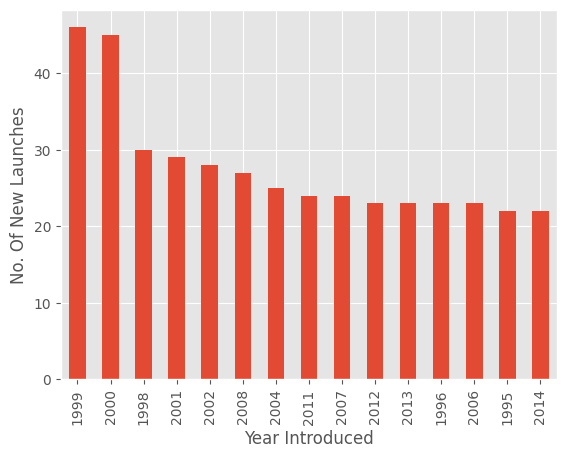

In [36]:
ax01 = df['year_introduced'].value_counts() \
    .head(15) \
    .plot(kind='bar')

ax01.set_xlabel('Year Introduced')
ax01.set_ylabel('No. Of New Launches')

Text(0.5, 0, 'Speed (mph)')

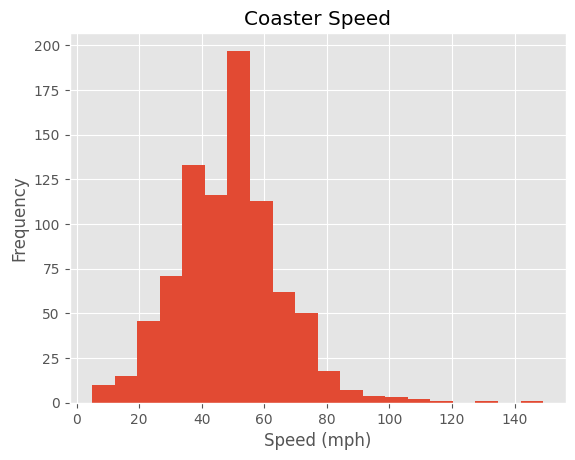

In [38]:
ax02 = df['speed_mph'].plot(kind='hist',bins=20,title='Coaster Speed')
ax02.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

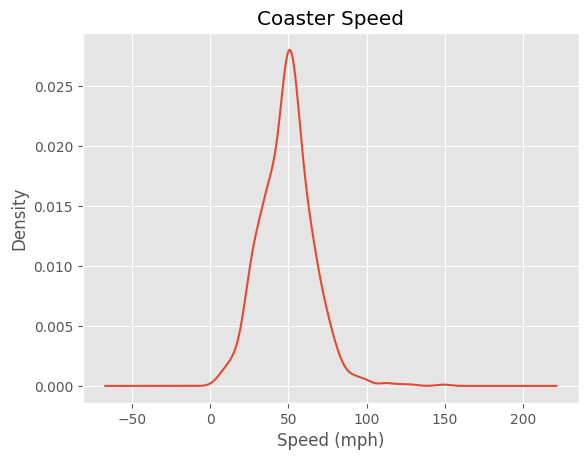

In [40]:
ax03 = df['speed_mph'].plot(kind='kde',title='Coaster Speed')
ax03.set_xlabel('Speed (mph)')

# **Feature Relationship**

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparison

In [41]:
df.head()

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
0,10 Inversion Roller Coaster,Chimelong Paradise,Operating,2006,Steel,Intamin,2006,23.0044,113.3269,Steel,2006-01-01,45.0,NaN,10,NaN
1,Abyss (roller coaster),Adventure World,Operating,1 November 2013,Steel – Euro-Fighter,Gerstlauer,2013,-32.0955,115.8170,Steel,2013-11-01,52.8,98.4,3,4.5
2,Abyssus,Energylandia,Operating,"July 14, 2021",Steel – Launched,Vekoma,2021,49.9992,19.4011,Steel,2021-07-14,62.1,NaN,4,4.5
3,Accelerator (roller coaster),Drayton Manor,Operating,21 April 2011,Steel – Junior – Boomerang,Vekoma,2011,52.6108,-1.7134,Steel,2011-04-21,37.3,65.6,0,3.0
4,Acrobat (roller coaster),Nagashima Spa Land,Operating,"July 18, 2015",Steel – Flying,Bolliger & Mabillard,2015,NaN,NaN,Steel,2015-07-18,55.9,NaN,4,NaN


## **Scatterplot**

<Axes: title={'center': 'Coaster Speed Vs Height'}, xlabel='speed_mph', ylabel='height_ft'>

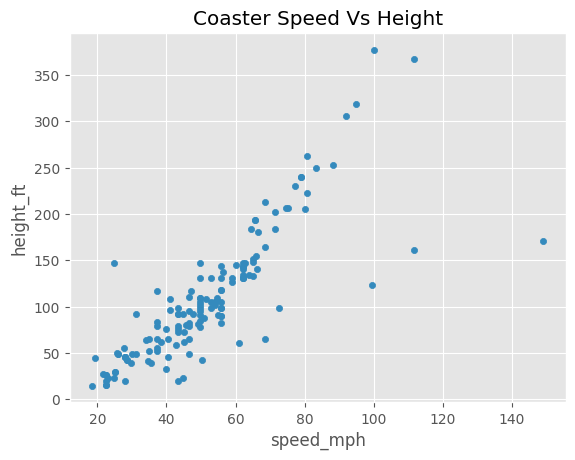

In [44]:
df.plot(kind='scatter',x='speed_mph',y='height_ft',title='Coaster Speed Vs Height')

<Axes: xlabel='speed_mph', ylabel='height_ft'>

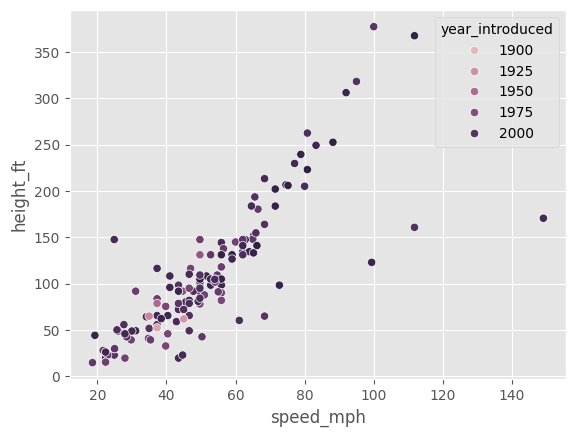

In [51]:
# Seaborn Scatterplot With Hue
sns.scatterplot(data=df,x='speed_mph',y='height_ft',hue='year_introduced')

## **Pairplot**

In [55]:
df.head()

,coaster_name,Location,Status,Opening date,Type,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
0,10 Inversion Roller Coaster,Chimelong Paradise,Operating,2006,Steel,Intamin,2006,23.0044,113.3269,Steel,2006-01-01,45.0,NaN,10,NaN
1,Abyss (roller coaster),Adventure World,Operating,1 November 2013,Steel – Euro-Fighter,Gerstlauer,2013,-32.0955,115.8170,Steel,2013-11-01,52.8,98.4,3,4.5
2,Abyssus,Energylandia,Operating,"July 14, 2021",Steel – Launched,Vekoma,2021,49.9992,19.4011,Steel,2021-07-14,62.1,NaN,4,4.5
3,Accelerator (roller coaster),Drayton Manor,Operating,21 April 2011,Steel – Junior – Boomerang,Vekoma,2011,52.6108,-1.7134,Steel,2011-04-21,37.3,65.6,0,3.0
4,Acrobat (roller coaster),Nagashima Spa Land,Operating,"July 18, 2015",Steel – Flying,Bolliger & Mabillard,2015,NaN,NaN,Steel,2015-07-18,55.9,NaN,4,NaN


In [53]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Type',
       'Manufacturer', 'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions', 'Gforce'],
      dtype='object')

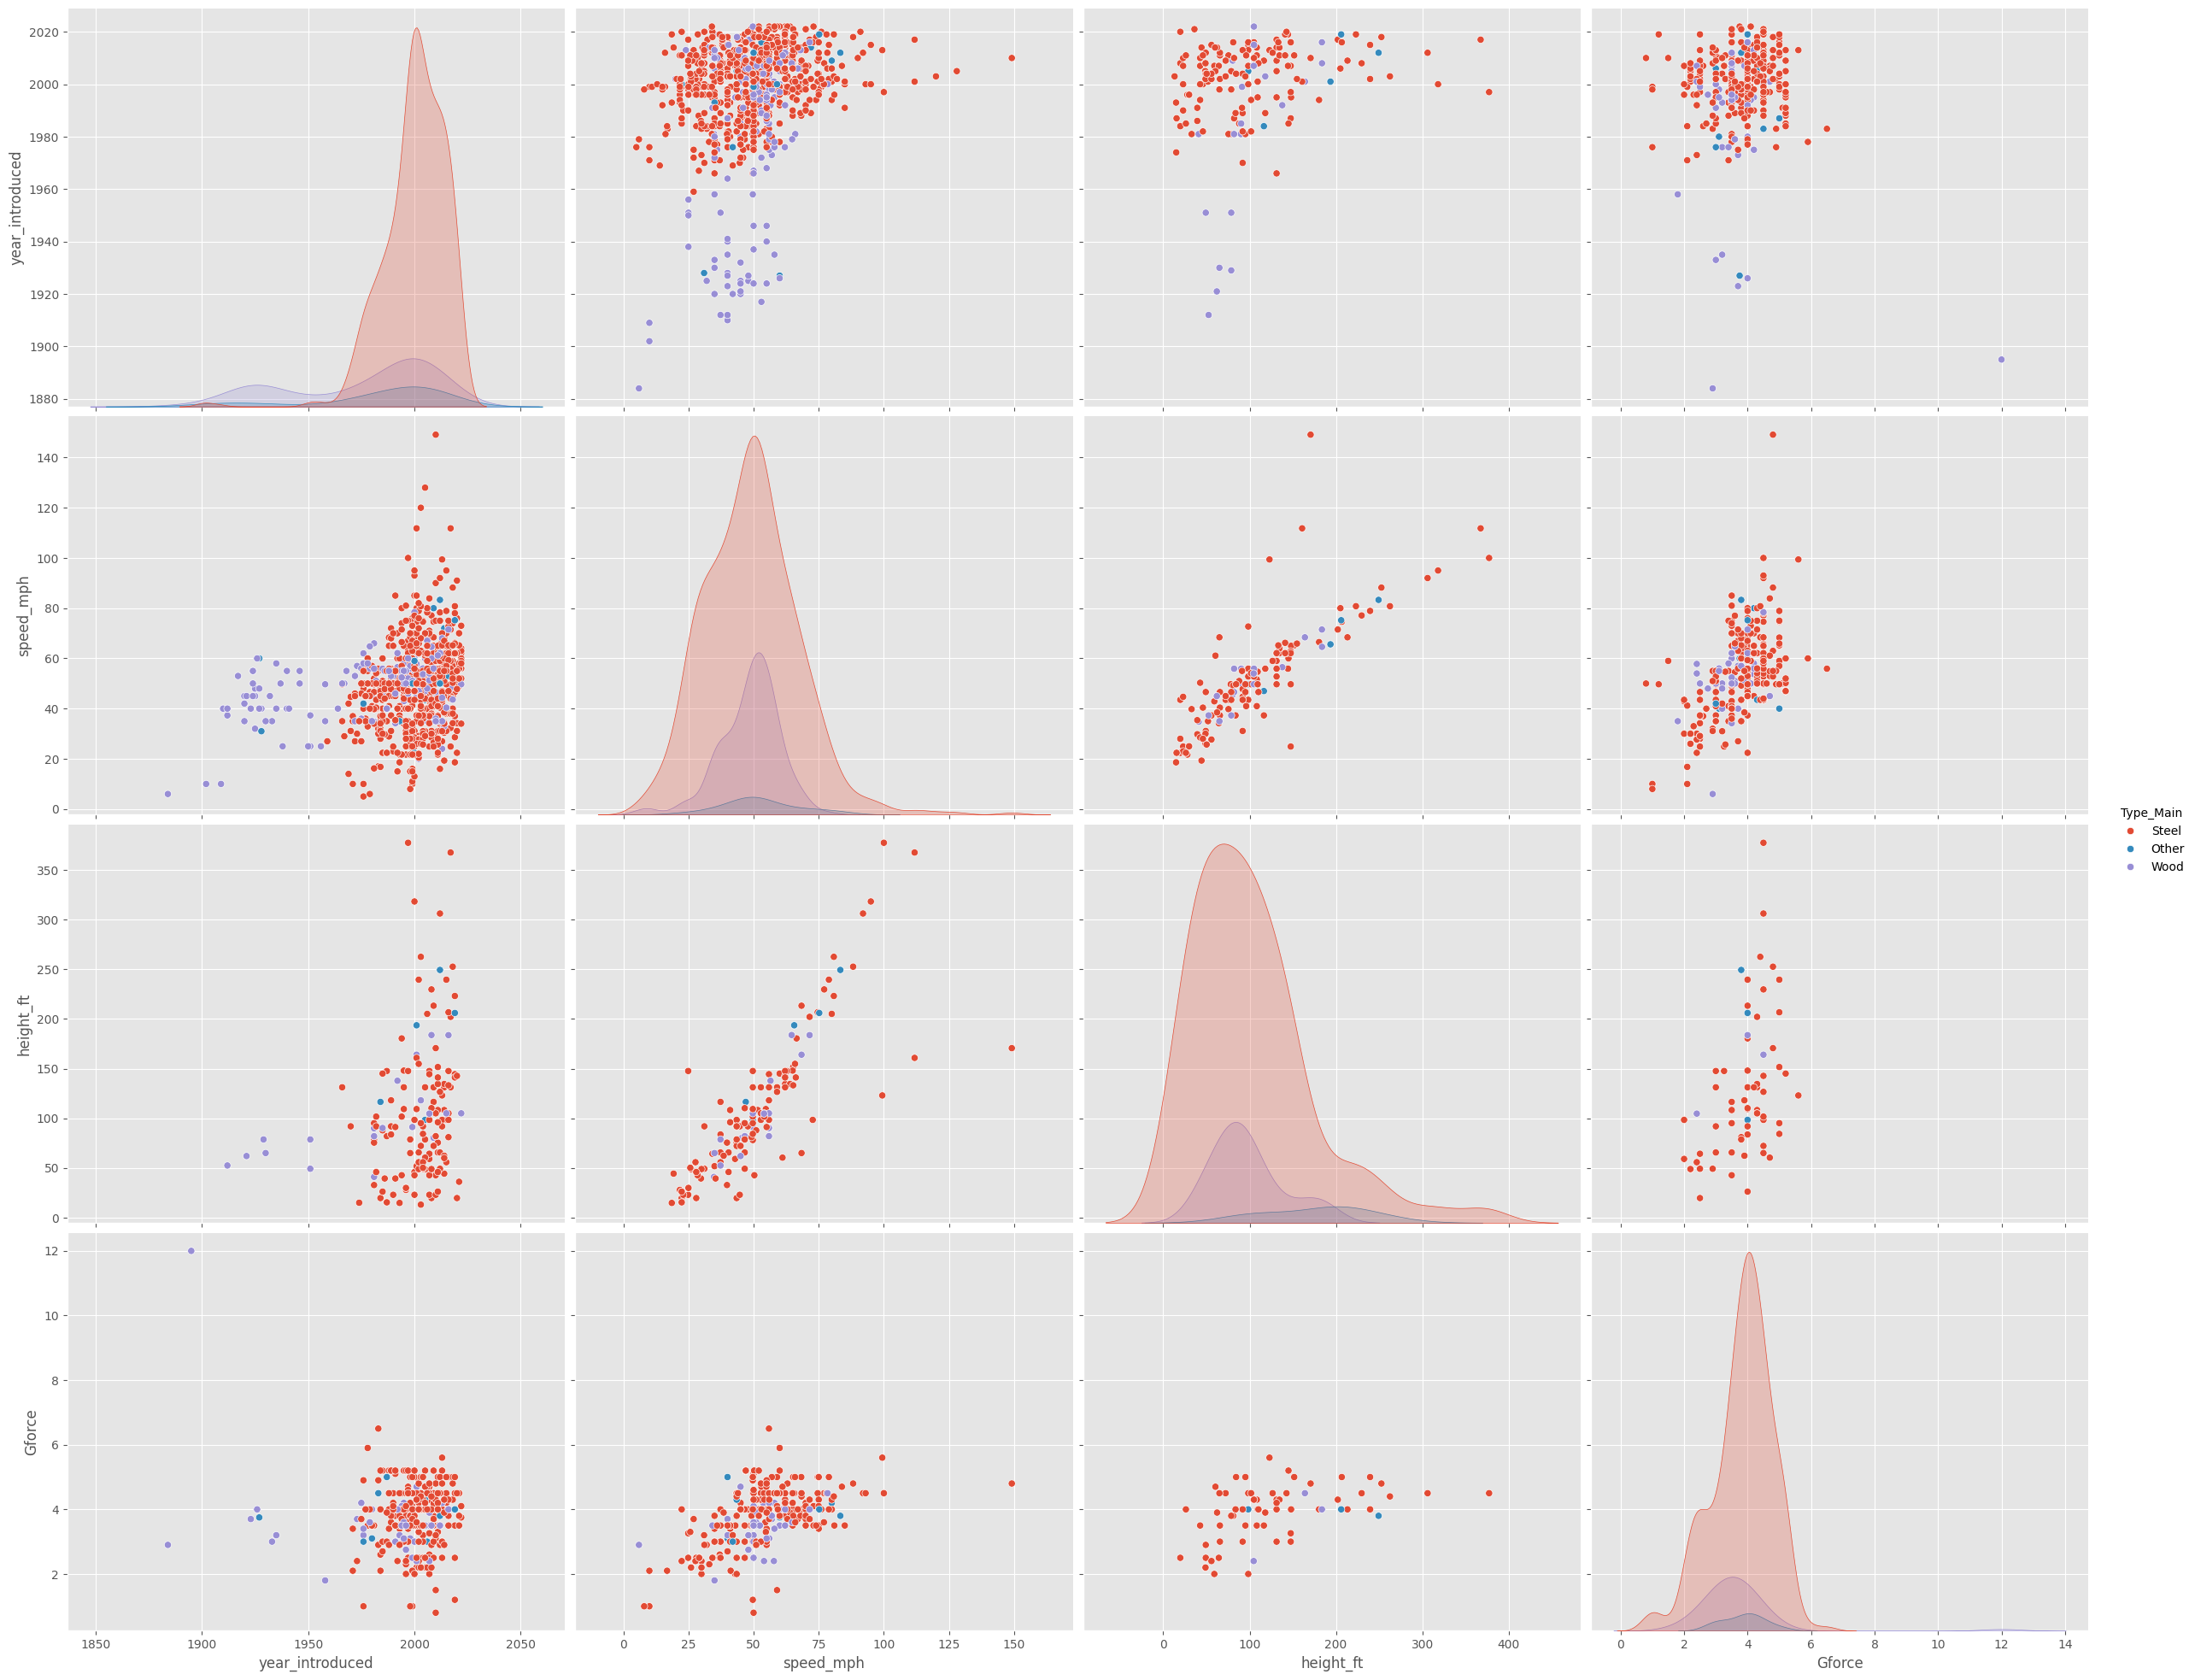

In [62]:
sns.pairplot(data=df,vars=['year_introduced','speed_mph', 'height_ft', 'Gforce'],
             hue='Type_Main',height=5,aspect=1.25)
plt.show()

## **Correlation Plot**

In [67]:
df.select_dtypes('number')

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions,Gforce
0,2006,23.0044,113.3269,45.0,NaN,10,NaN
1,2013,-32.0955,115.8170,52.8,98.4,3,4.5
2,2021,49.9992,19.4011,62.1,NaN,4,4.5
3,2011,52.6108,-1.7134,37.3,65.6,0,3.0
4,2015,NaN,NaN,55.9,NaN,4,NaN
...,...,...,...,...,...,...,...
985,1927,45.4730,-122.6606,NaN,NaN,0,NaN
986,1934,53.7902,-3.0539,NaN,NaN,0,NaN
987,1912,NaN,NaN,40.0,NaN,0,NaN
988,1997,41.6430,-72.9229,47.0,NaN,3,5.2


In [69]:
df.select_dtypes('number').columns

Index(['year_introduced', 'latitude', 'longitude', 'speed_mph', 'height_ft',
       'Inversions', 'Gforce'],
      dtype='object')

In [71]:
df_corr = df[['year_introduced','speed_mph','height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,year_introduced,speed_mph,height_ft,Inversions,Gforce
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

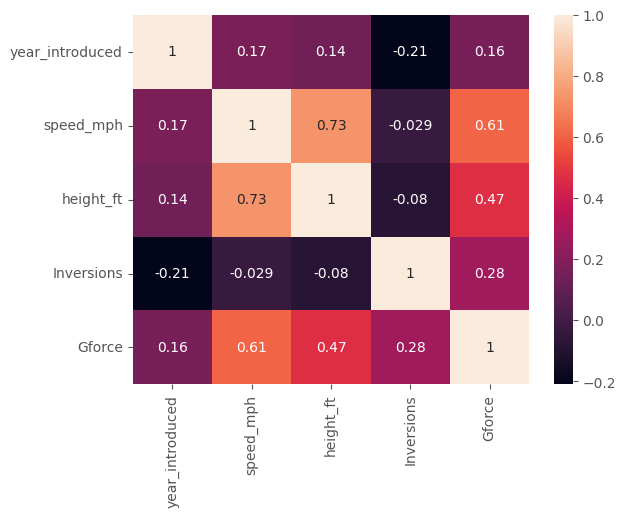

In [72]:
sns.heatmap(df_corr,annot=True)

# **Task**

* What is the location of fastest coasters ? (min 10 coasters)

In [74]:
df['Location'].value_counts()

Location
Other                              181
Kings Island                        19
Cedar Point                         18
Six Flags Magic Mountain            17
Hersheypark                         16
                                  ... 
Kuwait Entertainment City            1
MGM Grand Adventures Theme Park      1
Memphis Kiddie Park                  1
Olentangy Park                       1
ZDT's Amusement Park                 1
Name: count, Length: 280, dtype: int64

In [76]:
# Filter Out Other Locations
df.query('Location != "Other"')['Location'].value_counts()

Location
Kings Island                       19
Cedar Point                        18
Six Flags Magic Mountain           17
Hersheypark                        16
Carowinds                          14
                                   ..
Kuwait Entertainment City           1
MGM Grand Adventures Theme Park     1
Memphis Kiddie Park                 1
Olentangy Park                      1
ZDT's Amusement Park                1
Name: count, Length: 279, dtype: int64

In [78]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Type',
       'Manufacturer', 'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [86]:
# Filter Out Other Locations
df.query('Location != "Other"') \
    .groupby(by='Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >=10') \
    .sort_values(by='mean',ascending=False)

,mean,count
Location,,
Busch Gardens Williamsburg,58.318182,11
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.533333,12
Six Flags Great Adventure,53.036364,11
Kings Dominion,52.083333,12
Hersheypark,50.576923,13
Kings Island,49.273684,19
Carowinds,43.571429,14


<Axes: title={'center': 'Avg Coaster Speed By Location'}, ylabel='Location'>

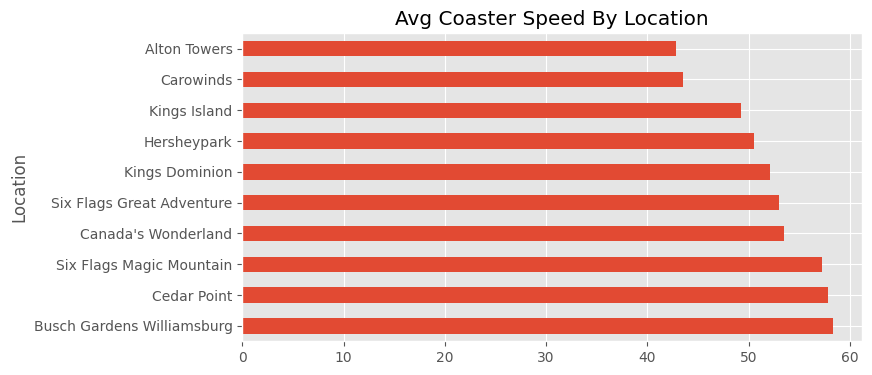

In [95]:
# Filter Out Other Locations
df.query('Location != "Other"') \
    .groupby(by='Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >=10') \
    .sort_values(by='mean',ascending=False)['mean'] \
    .plot(kind='barh',figsize=(8,4),title='Avg Coaster Speed By Location')